<a href="https://colab.research.google.com/github/Praaathaamesh/DL-API-Management/blob/main/Config/CDSS_DL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Important Packages



In [ ]:
!pip install wfdb==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.typing import LineStyleType
import seaborn as sns
import wfdb

In [ ]:
# Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the pickled Data

In [ ]:
# Loading signal and metadata

with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/X.pkl", 'rb') as f:
  X = pickle.load(f)

with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/Y.pkl", 'rb') as f:
  Y = pickle.load(f)


## Data Overview

- Consider metadata only; signal data is basically a np array
- Analyse the trends and metrics
- Understand the variablities

In [ ]:
# visualise first 5 datapoints/entries
Y.head(5)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [ ]:
# visualise last 5 datapoints/entries
Y.tail(5)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]
21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,supraventrikulÄre extrasystole(n) sinusrhythmu...,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,[NORM]
21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,sinusrhythmus p-sinistrocardiale lagetyp norma...,...,NaN,", I-AVL,",NaN,NaN,NaN,NaN,9,records100/21000/21837_lr,records500/21000/21837_hr,[NORM]


In [ ]:
# shape of metadata
Y.shape

(21799, 28)

In [ ]:
# columns of metadata
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass'],
      dtype='object')

In [ ]:
# information regarding metadata
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-null   object 
 13  infarc

In [ ]:
# Signal data is np.array
# filename column in metadata references the signal data
X[0]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

## Exploratory Data Analysis

- We generating some graphs in here Ladssss!

In [ ]:
# find unique patient IDs
print(f"There are in-total {len(Y.patient_id.unique())} patients.")
print(f"In literature, There has to be total in-total 188825 patients.")

There are in-total 18869 patients.
In literature, There has to be total in-total 188825 patients.


Total of 16244 have 1 diagnostic superclass(es)

Total of 4068 have 2 diagnostic superclass(es)

Total of 919 have 3 diagnostic superclass(es)

Total of 411 have 0 diagnostic superclass(es)

Total of 157 have 4 diagnostic superclass(es)



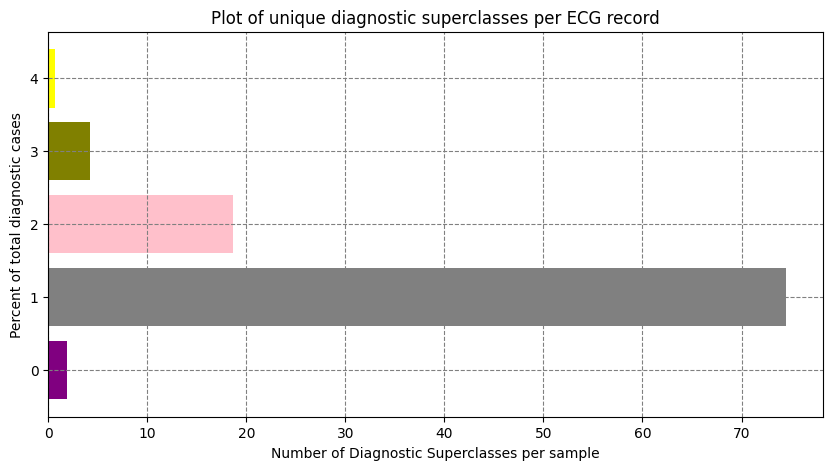

In [ ]:
# finding unique diagnostic superclasses per ECG record
Unique_DS_lens = Y.diagnostic_superclass.apply(len) # df of number of DS per numbers of ECG ID

Num_Entries = Unique_DS_lens.value_counts().values # separate numbers of ECG ID
Num_DSCount = Unique_DS_lens.value_counts().keys() # separate number of DS

# iterate over them using zip and two iterating vars
for entries, counts in zip(Num_Entries,Num_DSCount):
  print(f"Total of {entries} have {counts} diagnostic superclass(es)\n")

# generating Graph
plt.figure(figsize=(10,5))
colours = ["grey","pink","Olive","Purple","Yellow"]
plt.barh(Num_DSCount,(Num_Entries/(len(Y.diagnostic_superclass))*100), color = colours)
plt.ylabel("Percent of total diagnostic cases")
plt.xlabel("Number of Diagnostic Superclasses per sample")
plt.title("Plot of unique diagnostic superclasses per ECG record")
plt.grid(color = "grey", linestyle = "--")
plt.show()